# Вариант 6

## МИНИМИЗАЦИЯ ФУНКЦИЙ
## Задачи № 9.1.6, 9.4.2, 9.5.6, 9.6.6

## №9.1.6

### Методом Ньютона найти минимум и максимум унимодальной на отрезке [a, b] функции f(x) с точностью 10^-6. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

#### f(x) = 2^x - ln(x)
#### [a, b] = [0.1, 3]

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [167]:
def f(x):
    return 2**x - np.log(x)

def f1(x):
    return (np.log(2) * 2**x) - 1 / x
    
def f2(x):
    return (np.log(2))**2 * 2**x + 1 / x**2
    
[a, b] = [0.1, 3]

In [169]:
def newton_method(f1, f2, x0, t, tol=1e-6, max_iter=1000):
    x = x0
    iterations = 0
    for _ in range(max_iter):
        iterations += 1
        if t:
            x_new = x - f1(x) / f2(x)
        else:
            x_new = x + f1(x) / f2(x)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, iterations

In [171]:
x_min, iterations_min = newton_method(f1, f2, (a+b) / 2, True)

x_max, iterations_max = newton_method(f1, f2, (a+b) / 2, False)

/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_18027/117024254.py:5: RuntimeWarning: overflow encountered in scalar power
  return (np.log(2) * 2**x) - 1 / x
/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_18027/117024254.py:8: RuntimeWarning: overflow encountered in scalar power
  return (np.log(2))**2 * 2**x + 1 / x**2
/var/folders/54/8zj8sdk545x43jggjff_d2hc0000gn/T/ipykernel_18027/536399455.py:9: RuntimeWarning: invalid value encountered in scalar divide
  x_new = x + f1(x) / f2(x)


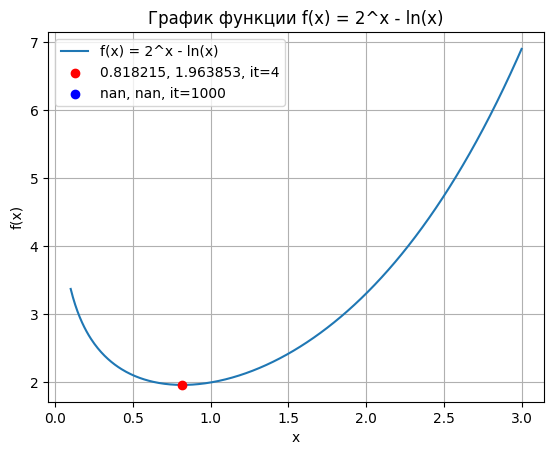

In [173]:
x_val = np.linspace(a, b, 400)
y_val = f(x_val)

plt.plot(x_val, y_val, label='f(x) = 2^x - ln(x)')
plt.scatter(x_min, f(x_min), color='red', zorder=5, label=f'{x_min:.6f}, {f(x_min):.6f}, it={iterations_min}')
plt.scatter(x_max, f(x_max), color='blue', zorder=5, label=f'{x_max:.6f}, {f(x_max):.6f}, it={iterations_max}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x) = 2^x - ln(x)')
plt.legend()
plt.grid(True)
plt.show()

## №9.4.2
### Функция f(x) представлена частичной суммой ряда f(x) = Sum(Ui(x)). Построить график функции на заданном отрезке [x1, x2] и найти ee минимумы и максимумы с указанной точностью. Деления отрезка пополам

#### f(x) = (-1)^n cos(2nx)/n^3
#### [x1, x2] = [0, 3]
#### n = 250
#### E = 10^-4

In [176]:
n = 250
[x1, x2] = [0, 3]
def f(x):
    n =250
    return sum(((-1)**k * np.cos(2 * k * x)) / k**3 for k in range(1, n + 1))

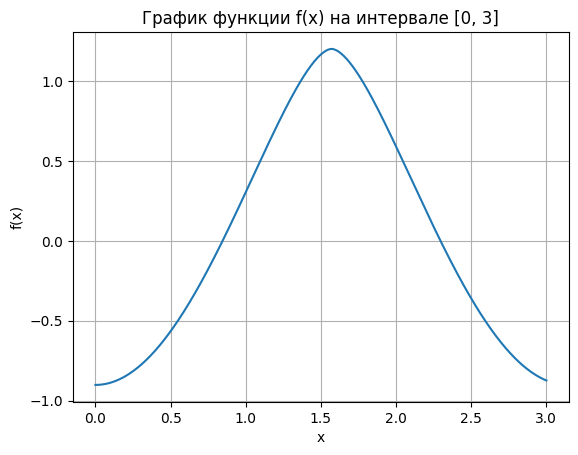

In [178]:
x_val = np.linspace(0, 3, 1000)

plt.plot(x_val, [f(x) for x in x_val])
plt.title('График функции f(x) на интервале [0, 3]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [180]:
def half_split(f, x1, x2, tol=1e-4, max_iter = 1000):
    it = 0
    while (x2 - x1) / 2 > tol and it < max_iter :
        it += 1
        mid = (x1 + x2) / 2
        if f(mid) < f((x1 + mid) / 2):
            x2 = mid
        else:
            x1 = mid
    return (x1 + x2) / 2, it

In [182]:
min_x, min_it = half_split(lambda x: -f(x), 0, 3)
print(f"Минимум функции достигается в точке x = {min_x} с значением f(x) = {f(min_x)}")

Минимум функции достигается в точке x = 9.1552734375e-05 с значением f(x) = -0.9015426339753603


In [184]:
max_x, max_it = half_split(f, x1, x2)
print(f"Максимум функции достигается в точке x = {max_x} с значением f(x) = {f(max_x)}")

Максимум функции достигается в точке x = 1.593841552734375 с значением f(x) = 1.1971939463639114


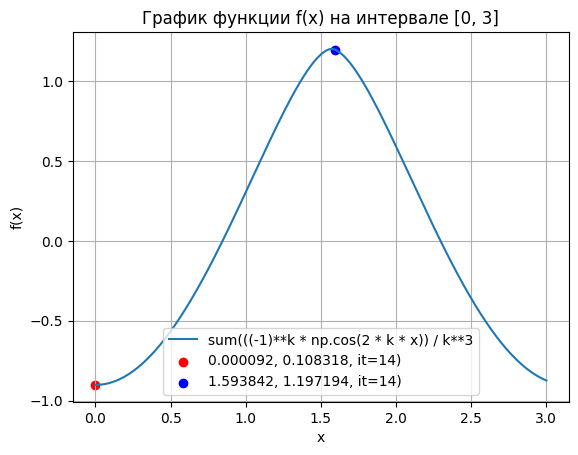

In [192]:
plt.plot(x_val, [f(x) for x in x_val], label = 'sum(((-1)**k * np.cos(2 * k * x)) / k**3')
plt.scatter(min_x, f(min_x), color='red', label=f'{min_x:.6f}, {f(min_y):.6f}, it={min_it})')
plt.scatter(max_x, f(max_x), color='blue', label=f'{max_x:.6f}, {f(max_x):.6f}, it={max_it})')

plt.title('График функции f(x) на интервале [0, 3]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## №9.5.6
### Найти минимум функции 2-х переменных f(x, y) с точностью на прямоугольнике [x1, x2][y1, y2]
### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
#### 1. Задать указанную в варианте функцию f(x, y)
#### 2. Построить графики функции и поверхностей уровня f(x, y)
#### 3. По графикам найти точки начального приближения к точкам экстремума.
#### 4. Используя встроенные функции, найти экстремумы функции c заданной точностью (см. ПРИЛОЖЕНИЕ 9.B).

#### f(x, y) = 4 * x**2 + y**2 + 3 * sin(x) - cos(y + 1) 
#### [x1, x2] = [-2, 0]
#### [y1, y2] = [-1, 1]
#### E = 10^-6

In [195]:
def f(x, y):
    return 4 * x**2 + y**2 + 3 * np.sin(x) - np.cos(y + 1) 
    
[x1, x2] = [-2, 0]

[y1, y2] = [-1, 1]

In [199]:
x_val = np.linspace(x1, x2, 1000)
y_val = np.linspace(y1, y2, 1000)
x, y = np.meshgrid(x_val, y_val)
z = f(x, y)

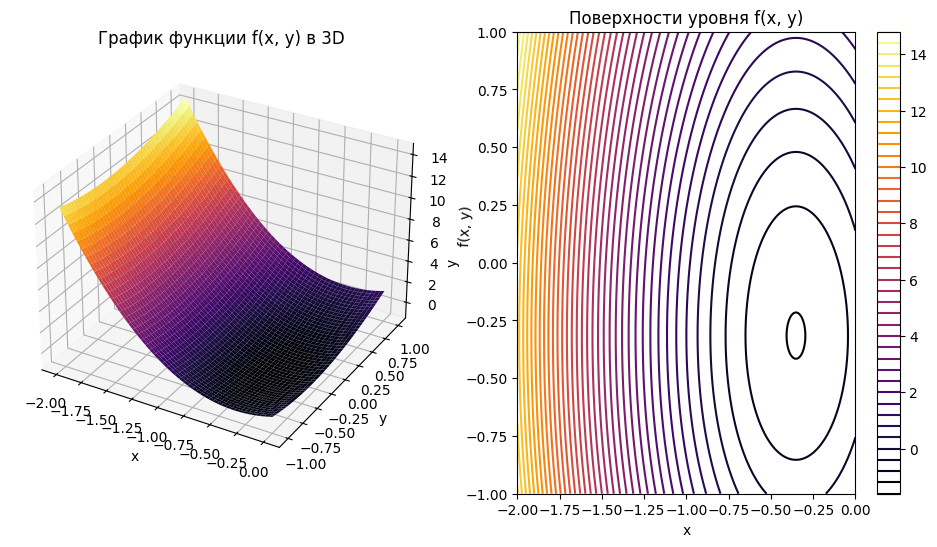

In [259]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, cmap='inferno')
ax1.set_title('График функции f(x, y) в 3D')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

ax2 = fig.add_subplot(122)
contour = ax2.contour(x, y, z, levels=50, cmap='inferno')
ax2.set_title('Поверхности уровня f(x, y)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
fig.colorbar(contour)

plt.show()


In [255]:
from scipy.optimize import minimize
result = minimize(lambda vars: f(vars[0], vars[1]), [-1, 0], method='BFGS', tol=1e-6)

In [257]:
min_x, min_y = result.x
min_f = result.fun
print(f"Минимум функции достигается в точке (x, y) = ({min_x}, {min_y}) с значением f(x, y) = {min_f}")

Минимум функции достигается в точке (x, y) = (-0.3520061100439398, -0.31596335757744376) с значением f(x, y) = -1.2139069323208604


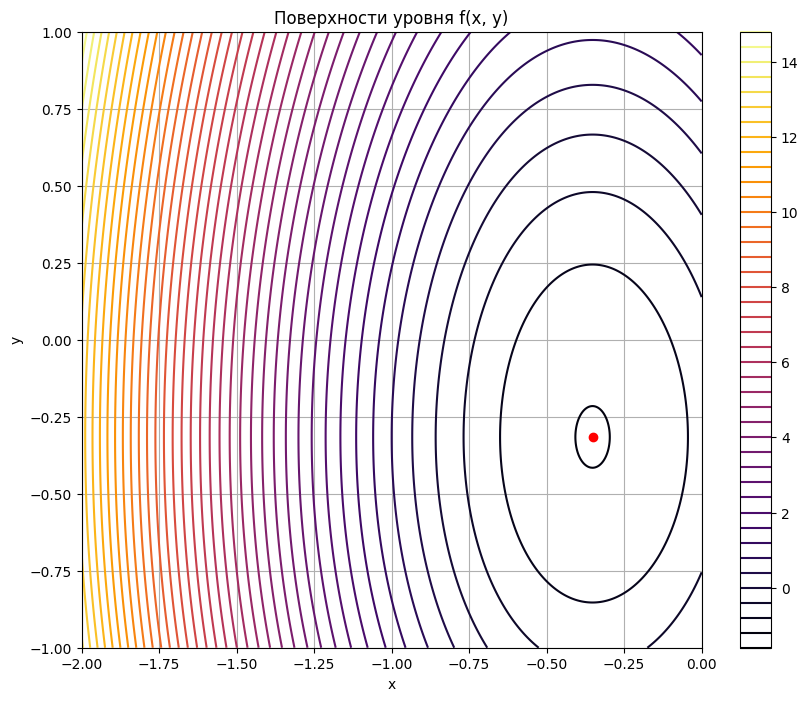

In [288]:
plt.figure(figsize=(10, 8))
contour = plt.contour(x, y, z, levels=50, cmap='inferno')
plt.scatter(min_x, min_y, color='red')
plt.title('Поверхности уровня f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.grid(True)
plt.show()

## №9.6.6
### Указанным в индивидуальном варианте методом найти минимум квадратичной функции. Для решения задачи одномерной минимизации использовать метод Ньютона. Построить график функции f . Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

#### f(x, y) = 2.5 * x**2  + x * y + 2 * y**2  -5 * x -10.5 * y
#### Наискорейший спуск
#### E = 10^-6

In [1]:
def f(x, y): 
    return 2.5 * x**2  + x * y + 2 * y**2  -5 * x -10.5 * y

def df_dx(x, y):
    return  5 * x + y - 5

def df_dy(x, y):
    return x + 4 * y - 10.5

In [9]:
from scipy.optimize import minimize_scalar
def the_fastest_possible_fall(x, y, epsilon):
    iterations = 0
    while True:
        grad_x = df_dx(x, y)
        grad_y = df_dy(x, y)
        if abs(grad_x) < epsilon and abs(grad_y) < epsilon:
            break
        res = minimize_scalar(lambda alpha: f(x - alpha * grad_x, y - alpha * grad_y))
        alpha = res.x
        x = x - alpha * grad_x
        y = y - alpha * grad_y
        iterations += 1
    return x, y, f(x, y), iterations

x_min, y_min, f_min, it = the_fastest_possible_fall(0.0, 0.0, 1e-6)
print(f"Минимум функции достигается в точке (x, y) = ({x_min:.6f}, {y_min:.6f}) со значением f(x, y) = {f_min:.6f}")
print(f"Число итераций: {it}")

Минимум функции достигается в точке (x, y) = (0.500000, 2.500000) со значением f(x, y) = -14.375000
Число итераций: 11


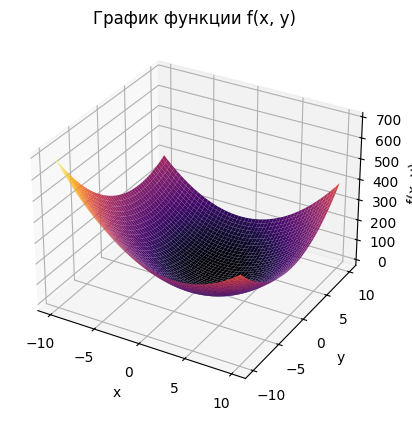

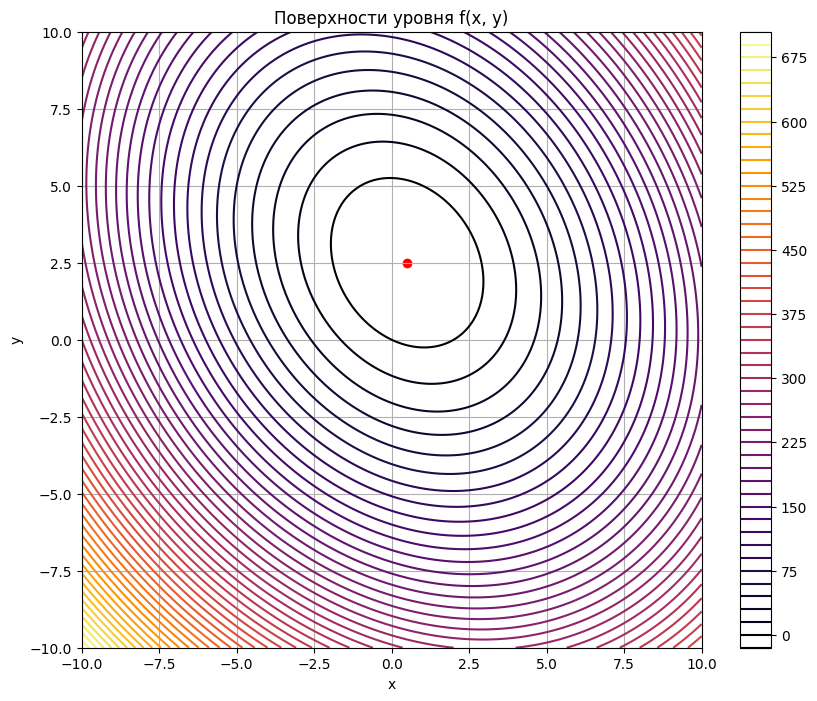

In [27]:
x_range = np.linspace(-10, 10, 1000)
y_range = np.linspace(-10, 10, 1000)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)
z_mesh = f(x_mesh, y_mesh)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_mesh, y_mesh, z_mesh, cmap='inferno')

ax.set_title('График функции f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

plt.figure(figsize=(10, 8))
contour = plt.contour(x_mesh, y_mesh, z_mesh, levels=50, cmap='inferno')
plt.scatter(x_min, y_min, color='red')
plt.title('Поверхности уровня f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(contour)
plt.grid(True)
plt.show()